Data Preview:
                                            apk_name  \
0  265807d535be4593505b216e939d432cc8ed1f67fc24b7...   
1  836f043f75472b44d599ceb47597baff2e85737779aa86...   
2  c00b506a3493c91e1f99d60ea06b14fb1f831d4e4dd4d8...   
3  e3b9ee624e346b7eb953191cd98f166b3bf8c109595a06...   
4  1838d36c717aab98cd7aa822db1d4343abe11e9585e5ba...   

                               package_name  min_sdk  target_sdk version_name  \
0              bpst.met.sharinganlockscreen     15.0        20.0       4 beta   
1                   com.waterousco.techtool      9.0        24.0        1.1.3   
2  com.lego.scoobydoo.escapefromhauntedisle     15.0        22.0        1.1.1   
3           com.MotherNatureLWP.loveroselwp     10.0        17.0          8.0   
4         air.com.zyncstudio.IroningClothes      9.0        16.0        7.5.1   

   version_code                                        permissions  \
0           6.0  android.permission.READ_SMS,android.permission...   
1         113.0       

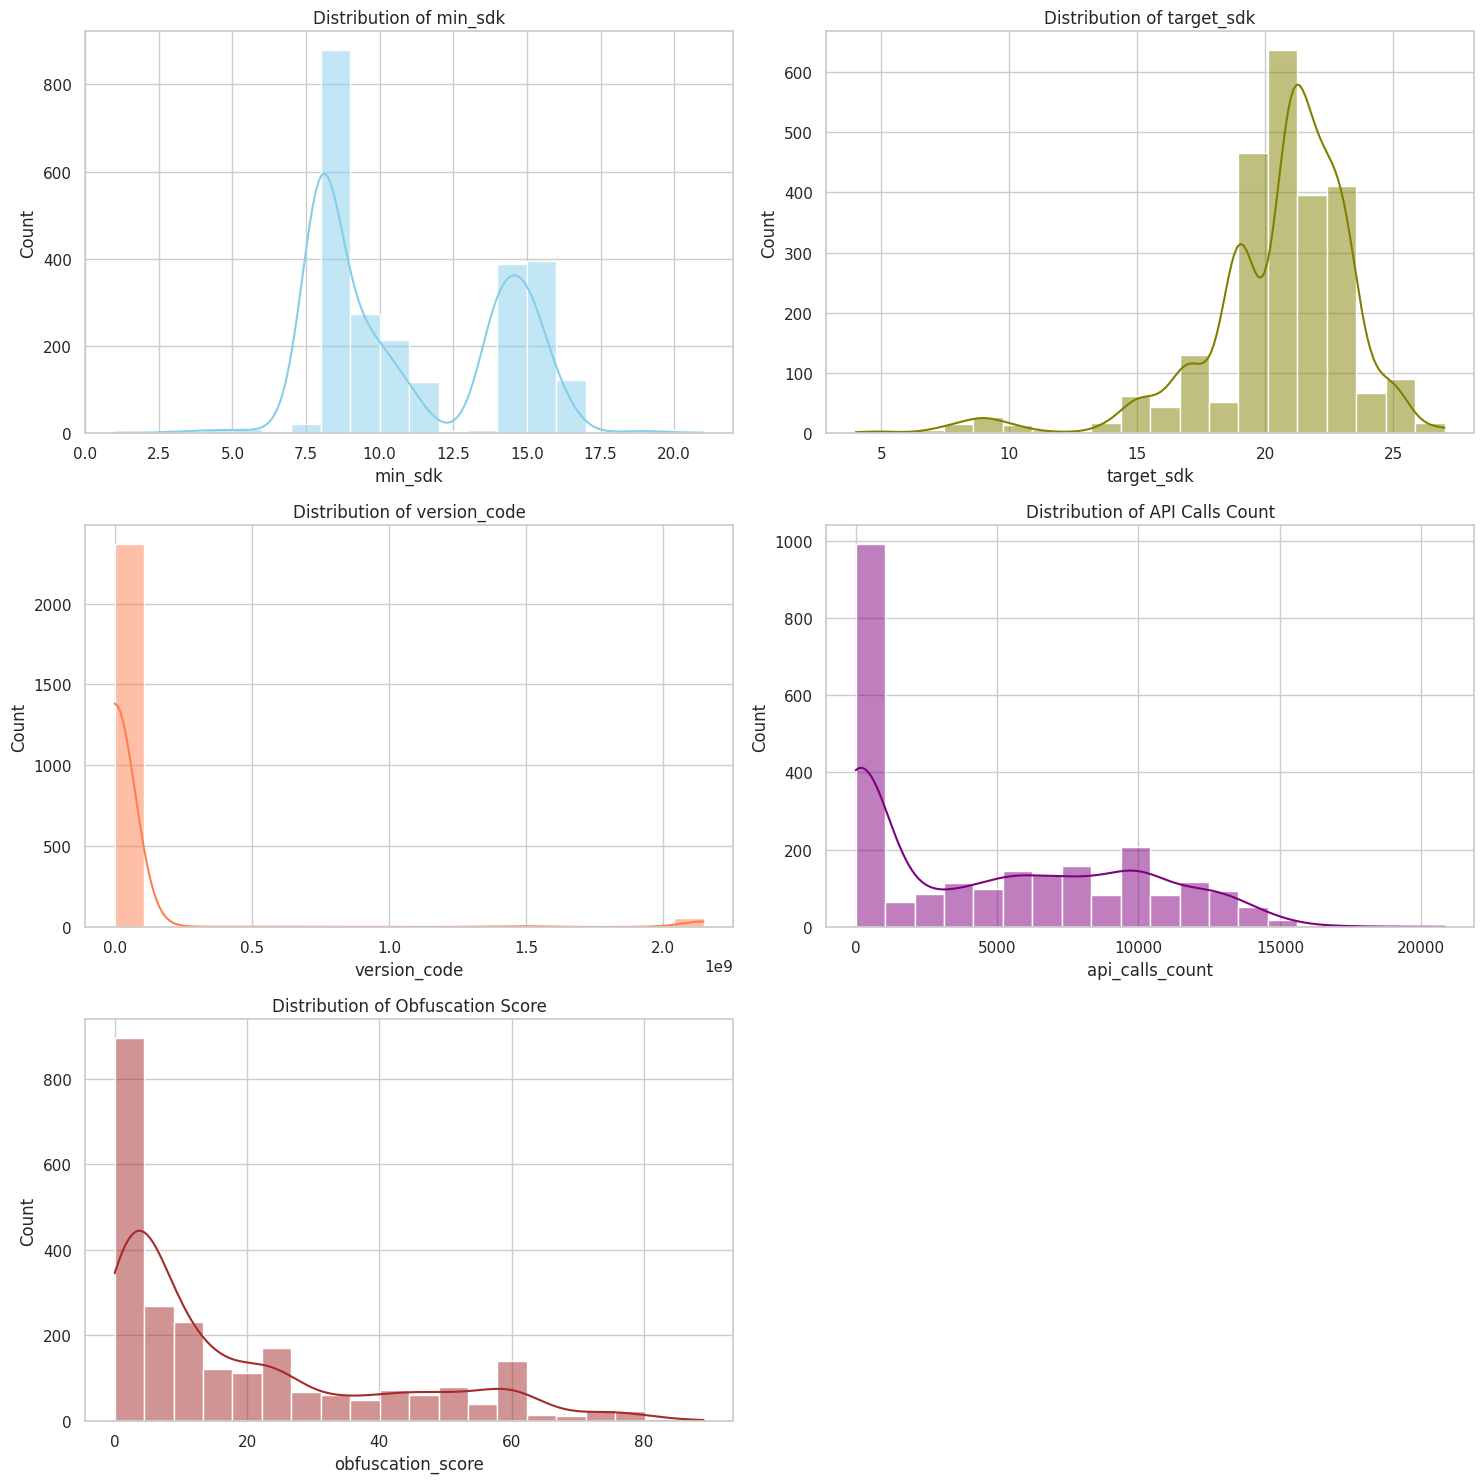

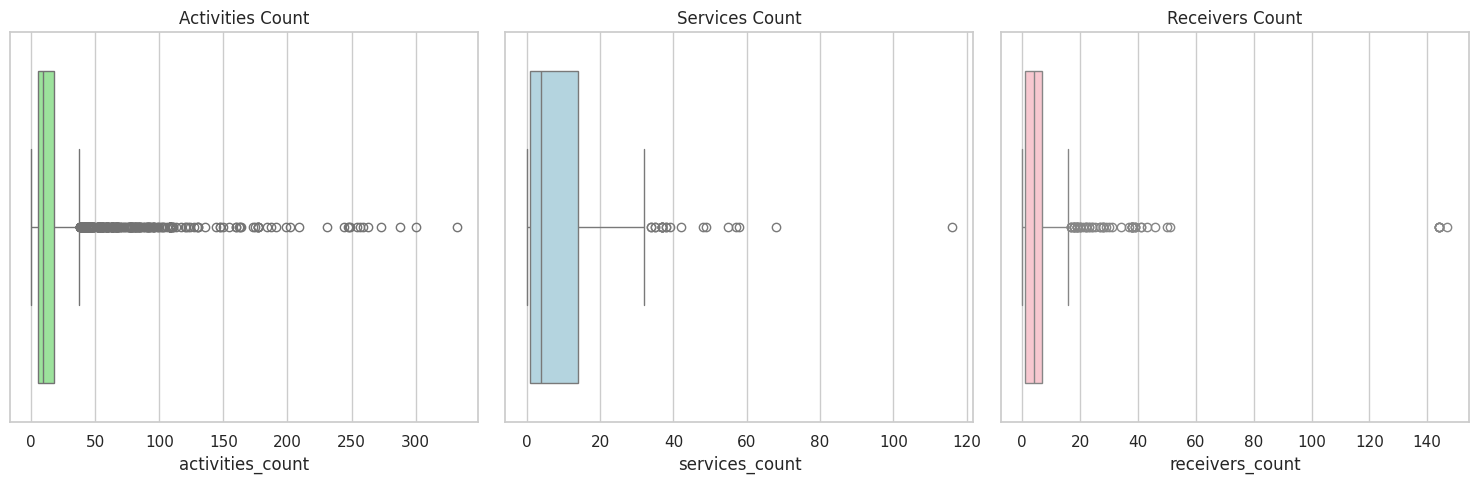

/tmp/ipykernel_3230517/500187199.py:95: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


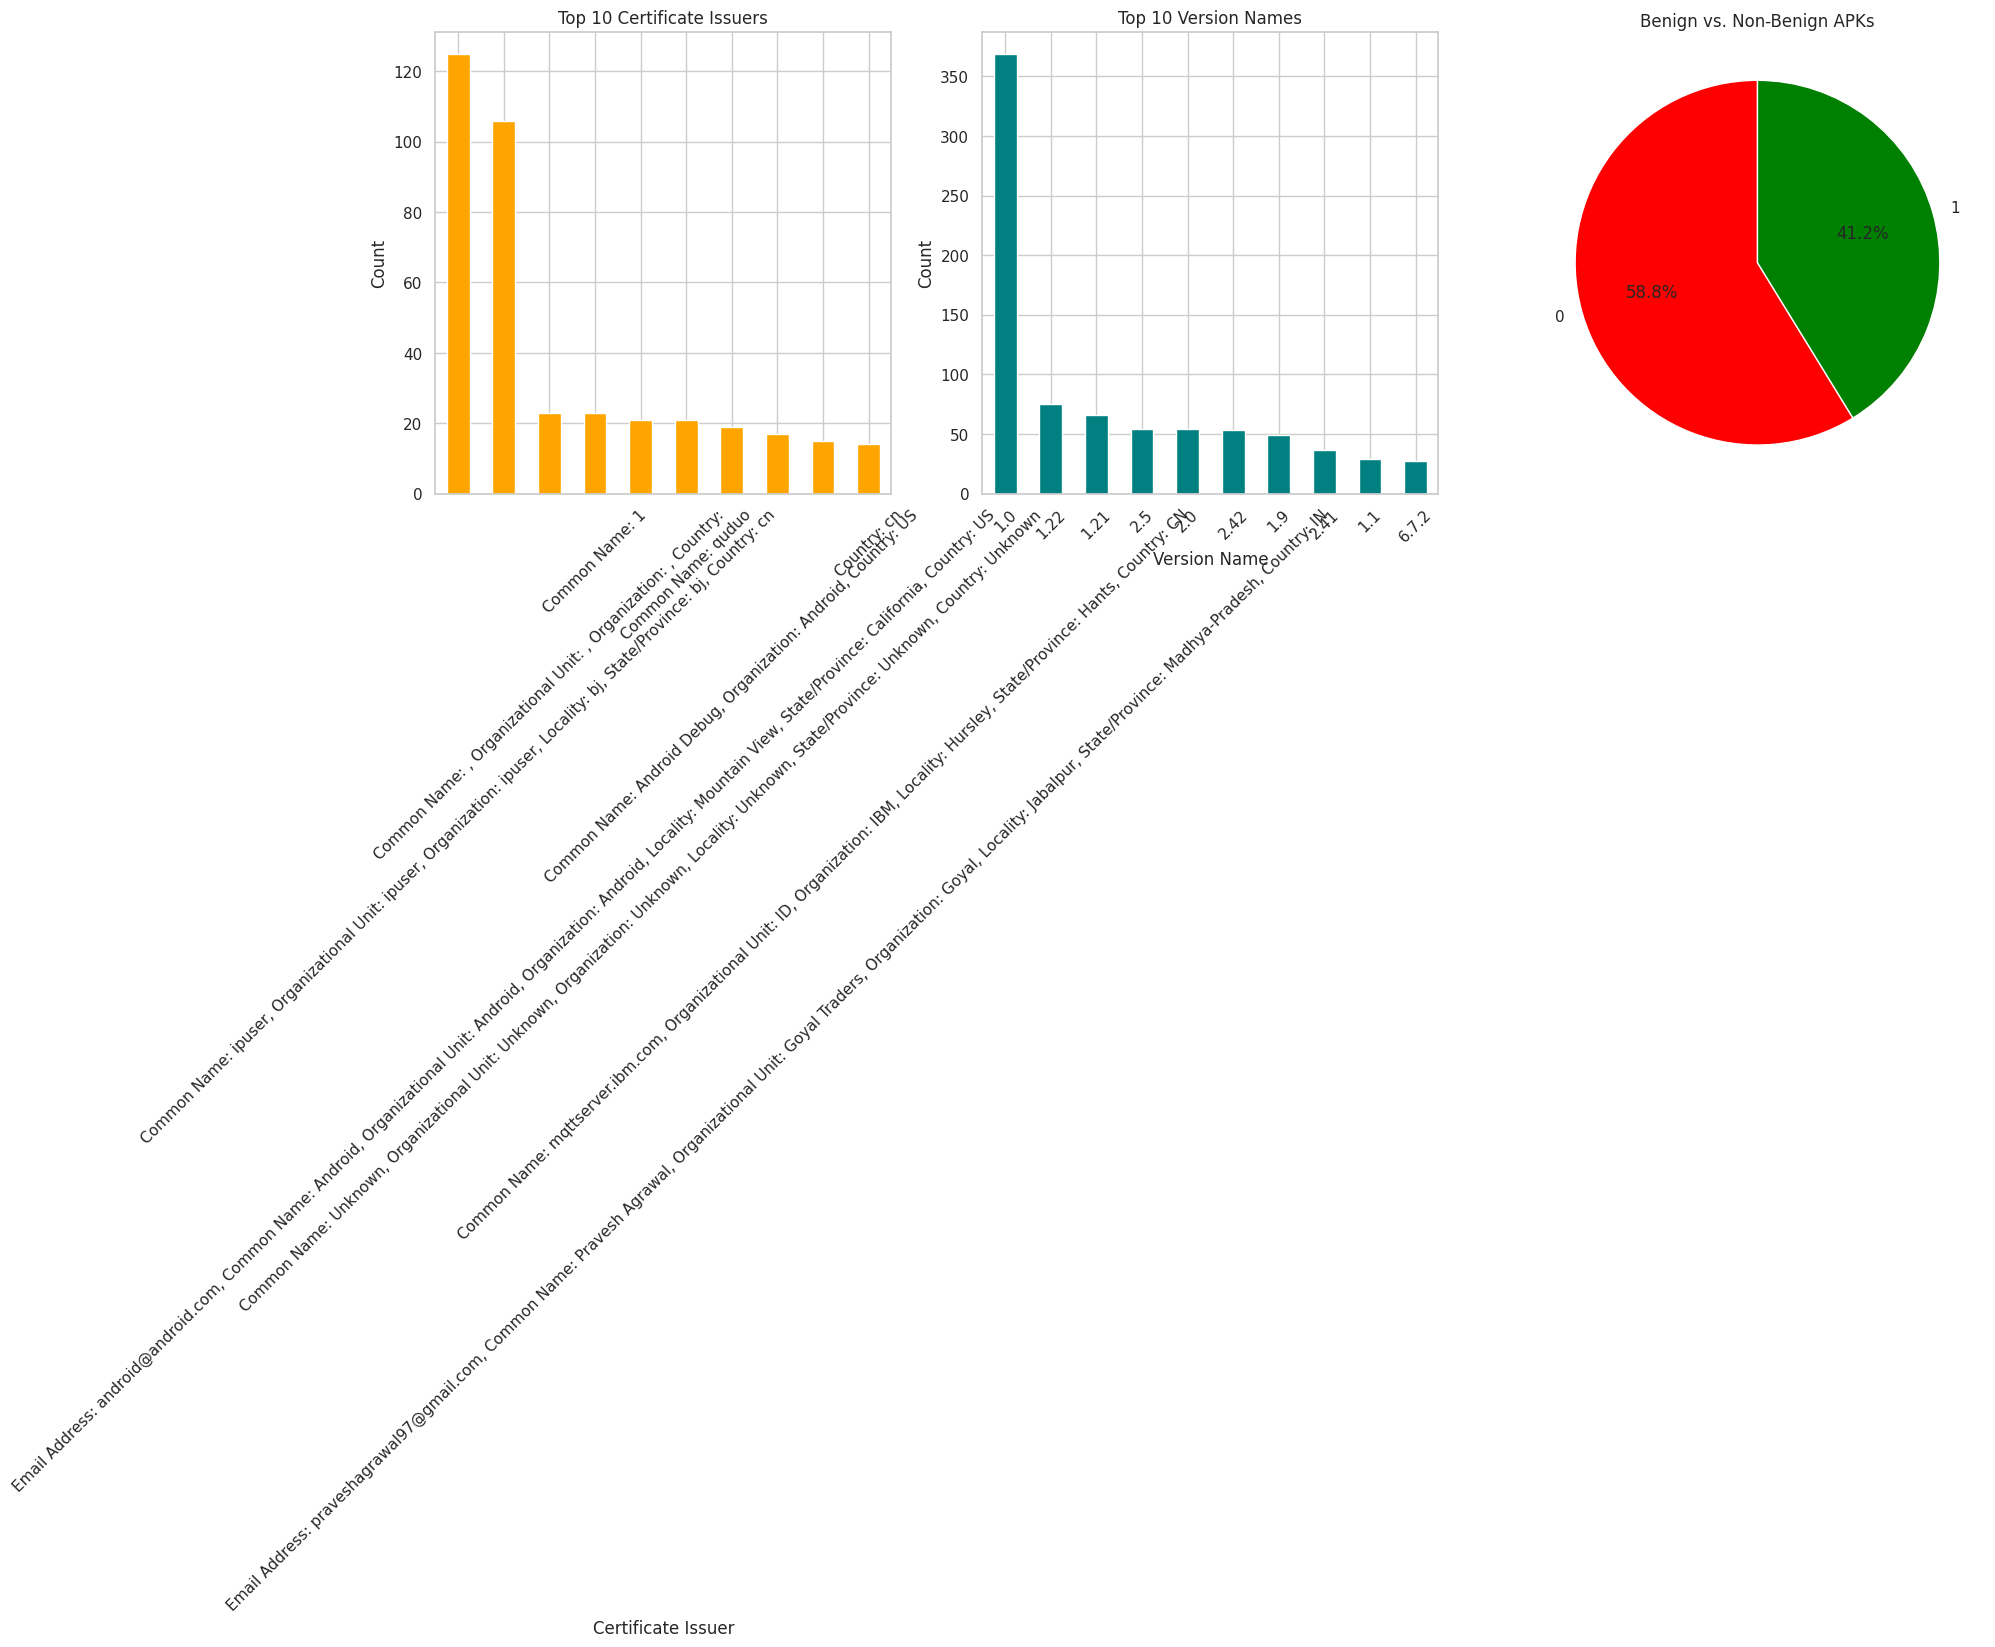

<Figure size 1200x600 with 0 Axes>

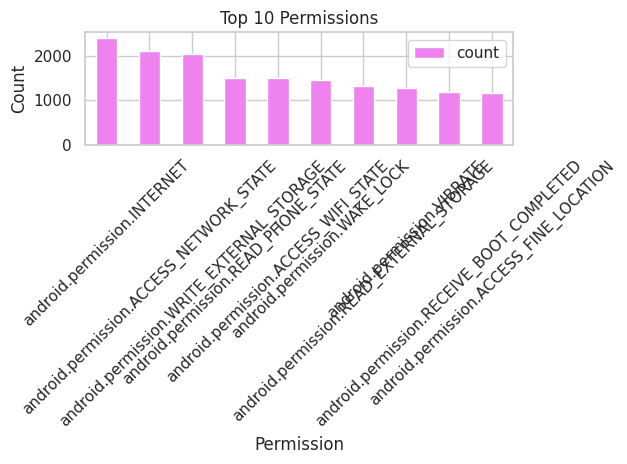

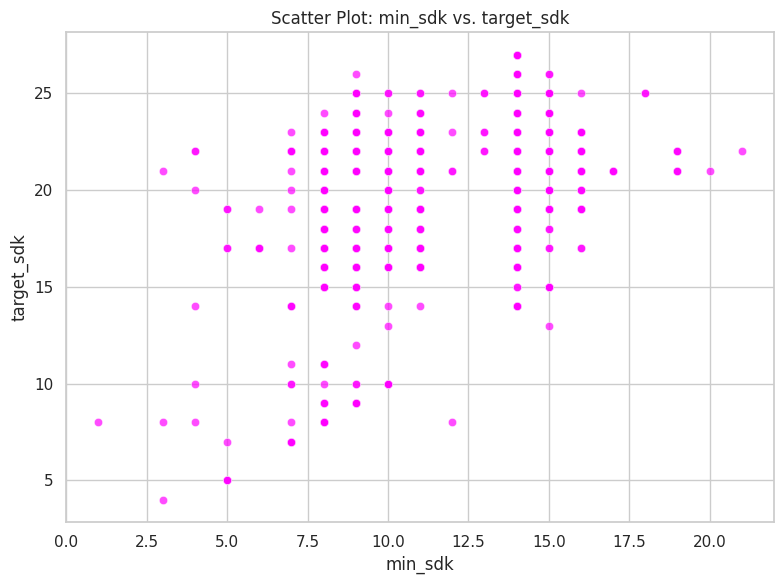

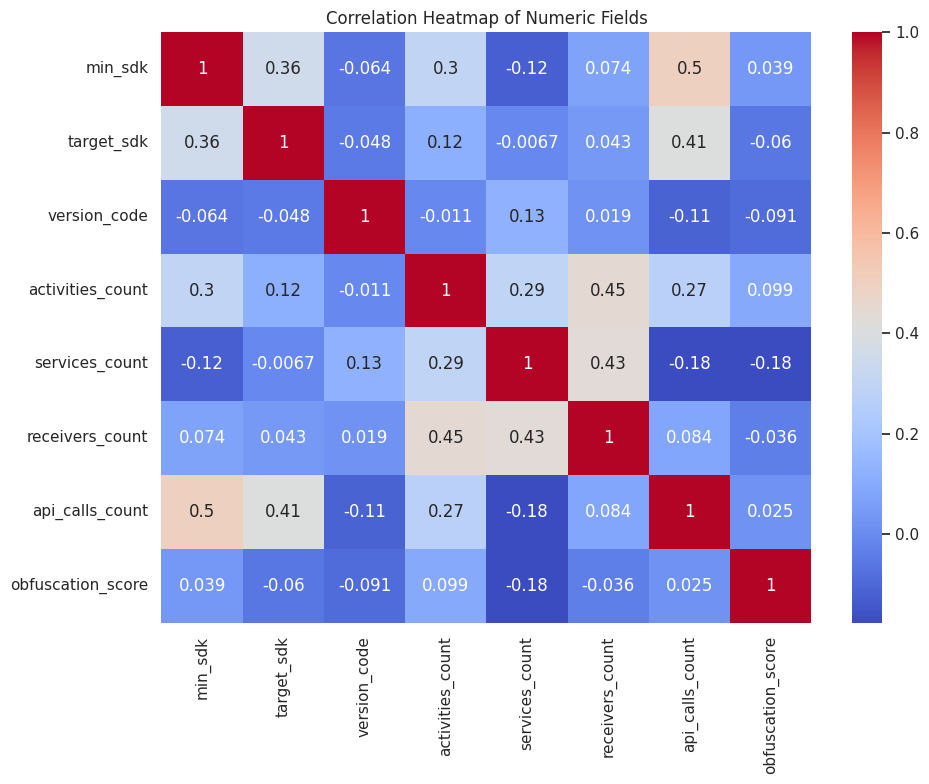

/tmp/ipykernel_3230517/500187199.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_benign', y='obfuscation_score', data=df, palette=['red', 'green'])


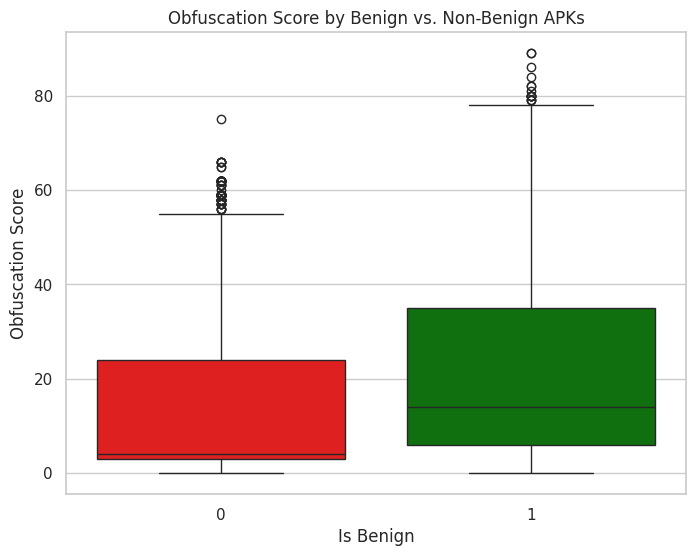

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Ensure plots display in the notebook
%matplotlib inline
sns.set(style="whitegrid")

# -------------------------------
# 1. Load the Data
# -------------------------------
data_path = '/home/john/MaliciousAPKDetection/Output/static_features_cleaned.csv'
df = pd.read_csv(data_path)
print("Data Preview:")
print(df.head())

# -------------------------------
# 2. Numeric Fields: Histograms
# Fields: min_sdk, target_sdk, version_code, api_calls_count, obfuscation_score
# -------------------------------
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

sns.histplot(df['min_sdk'], bins=20, kde=True, color='skyblue', ax=axs[0])
axs[0].set_title('Distribution of min_sdk')

sns.histplot(df['target_sdk'], bins=20, kde=True, color='olive', ax=axs[1])
axs[1].set_title('Distribution of target_sdk')

sns.histplot(df['version_code'], bins=20, kde=True, color='coral', ax=axs[2])
axs[2].set_title('Distribution of version_code')

sns.histplot(df['api_calls_count'], bins=20, kde=True, color='purple', ax=axs[3])
axs[3].set_title('Distribution of API Calls Count')

sns.histplot(df['obfuscation_score'], bins=20, kde=True, color='brown', ax=axs[4])
axs[4].set_title('Distribution of Obfuscation Score')

# Hide unused subplot
axs[5].axis('off')

plt.tight_layout()
plt.show()

# -------------------------------
# 3. Count Fields: Box Plots
# Fields: activities_count, services_count, receivers_count
# -------------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df['activities_count'], color='lightgreen', ax=axs[0])
axs[0].set_title('Activities Count')
axs[0].set_xlabel('activities_count')

sns.boxplot(x=df['services_count'], color='lightblue', ax=axs[1])
axs[1].set_title('Services Count')
axs[1].set_xlabel('services_count')

sns.boxplot(x=df['receivers_count'], color='pink', ax=axs[2])
axs[2].set_title('Receivers Count')
axs[2].set_xlabel('receivers_count')

plt.tight_layout()
plt.show()

# -------------------------------
# 4. Categorical Fields: Bar and Pie Charts
# Fields: certificate_issuer (Top 10), version_name (Top 10), is_benign (Pie Chart)
# -------------------------------
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Top 10 Certificate Issuers
issuer_counts = df['certificate_issuer'].value_counts().head(10)
issuer_counts.plot(kind='bar', color='orange', ax=axs[0])
axs[0].set_title('Top 10 Certificate Issuers')
axs[0].set_xlabel('Certificate Issuer')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Top 10 Version Names
version_counts = df['version_name'].value_counts().head(10)
version_counts.plot(kind='bar', color='teal', ax=axs[1])
axs[1].set_title('Top 10 Version Names')
axs[1].set_xlabel('Version Name')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# Benign vs. Non-Benign APKs Pie Chart
benign_counts = df['is_benign'].value_counts()
benign_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'], ax=axs[2])
axs[2].set_title('Benign vs. Non-Benign APKs')
axs[2].set_ylabel('')

plt.tight_layout()
plt.show()

# -------------------------------
# 5. Permissions Field: Top 10 Permissions
# -------------------------------
# Split permissions (handling missing values)
permissions_series = df['permissions'].dropna().apply(lambda x: x.split(','))
permissions_flat = [perm.strip() for sublist in permissions_series for perm in sublist]
permission_counts = Counter(permissions_flat)
perm_df = pd.DataFrame.from_dict(permission_counts, orient='index', columns=['count']).sort_values('count', ascending=False)

plt.figure(figsize=(12,6))
perm_df.head(10).plot(kind='bar', color='violet')
plt.title('Top 10 Permissions')
plt.xlabel('Permission')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 6. Additional Exploratory Plots
# a. Scatter Plot: min_sdk vs. target_sdk
# b. Correlation Heatmap for Numeric Fields
# -------------------------------
# Scatter Plot: min_sdk vs. target_sdk
plt.figure(figsize=(8,6))
sns.scatterplot(x='min_sdk', y='target_sdk', data=df, color='magenta', alpha=0.7)
plt.title('Scatter Plot: min_sdk vs. target_sdk')
plt.xlabel('min_sdk')
plt.ylabel('target_sdk')
plt.tight_layout()
plt.show()

# Correlation Heatmap for Numeric Fields
numeric_fields = ['min_sdk', 'target_sdk', 'version_code', 'activities_count', 
                  'services_count', 'receivers_count', 'api_calls_count', 'obfuscation_score']
plt.figure(figsize=(10,8))
corr = df[numeric_fields].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Fields')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='is_benign', y='obfuscation_score', data=df, palette=['red', 'green'])
plt.title('Obfuscation Score by Benign vs. Non-Benign APKs')
plt.xlabel('Is Benign')
plt.ylabel('Obfuscation Score')
plt.show()

